# 1. 데이터 준비하기
* ### CSV 파일과 EXCEL 파일 읽기
* ### 데이터 수정하기

In [3]:
# https://www.youtube.com/watch?v=pFXipjh0ghw&list=PLVNY1HnUlO26Igldy2Q6Nb2LZbpQWTyle
# 데이터 분석 및 조작을 위한 라이브러리 Pandas Import 하기
import pandas as pd


In [4]:
# CSV(콤마로 구분되어 있는 파일)을 불러오는 함수 : pd.read_csv("파일 루트",encoding = "utf-8") utf-8은 한글로 변환하기 위해서 필요하다. 
CCTV_Seoul = pd.read_csv("01. CCTV_in_Seoul.csv",encoding = 'utf-8')
# 데이터 프레임의 상위 5개의 정보를 알려주는 함수 : DataFrame.head()
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [5]:
#데이터 프레임 인덱싱
CCTV_Seoul[["기관명","소계"]].head()

# 기관명과 소계만 나온다

,기관명,소계
0,강남구,2780
1,강동구,773
2,강북구,748
3,강서구,884
4,관악구,1496


In [6]:
#데이터 프레임의 열의 이름을 바꾸는 함수 : DataFrame.rename(columns = {"바꿔야 되는 이름" : "바꿀 이람",...},inplace = (True면 변경,False는 변경하지 않음))
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : "구별",CCTV_Seoul.columns[1] : "합계"},inplace=True)
CCTV_Seoul.head()

# 기관명이 구별로, 소계가 합계로 바뀌었다.

,구별,합계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [7]:
# Excel 파일을 불러오는 함수 : pd.read_excel("파일 루트",header = 몇번째 향부터 가져올지, usecols = [몇번쨰 열만 가져올지]) 
pop_Seoul = pd.read_excel("01. population_in_Seoul.xls",header = 2,usecols=[1,3,6,9,13])
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [8]:
#데이터 프레임의 열들의 이름들을 바꿀 수 있다.
pop_Seoul.columns = ["구별","인구수","한국인","외국인","고령자"]
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


---

# 2. Pandas 기초

In [9]:
# https://www.youtube.com/watch?v=OIV14ItViP0
# 행렬이나 대규모 다차원 규모 배열을 쉽게 처리할 수 있는 라이브러리
import numpy as np

In [10]:
# pandas의 DataFrame은 여러개의 Series로 구성되어 있는데 Series는 numpy 배열의 업그레이드 버전이다. 쉽게 생각해서 numpy 배열에 Index가 추가된 배열이다.
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [11]:
#날짜로도 만들수 있다.
dates = pd.date_range("20160101",periods=6)
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
# DataFrame은 pd.DataFrame(값,인덱스 이름(열),행 이름)로 선언할 수 있다.
df = pd.DataFrame(np.random.randn(6,4),index = dates,columns=["A","B","C","D"])
df

,A,B,C,D
2016-01-01,-0.833569,1.660487,1.940457,0.317405
2016-01-02,0.121147,0.623336,-0.092540,0.782699
2016-01-03,-0.615978,-0.391347,-0.218210,2.461592
2016-01-04,-1.587277,-0.483833,-0.691111,0.958451
2016-01-05,1.363039,0.067098,0.805653,0.620054
2016-01-06,-0.680879,0.913301,0.332103,0.223550


In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2016-01-01 to 2016-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [14]:
# 한 기준으로 정렬을 할 수 있는 함수가 있다. 인자로 정렬할 기준을 받고 오름차순, 내림차순을 결정할 bool 값을 받는다. (True : 오름차순, False : 내림차순)
(df.sort_values(by=["B"],ascending=False))


,A,B,C,D
2016-01-01,-0.833569,1.660487,1.940457,0.317405
2016-01-06,-0.680879,0.913301,0.332103,0.223550
2016-01-02,0.121147,0.623336,-0.092540,0.782699
2016-01-05,1.363039,0.067098,0.805653,0.620054
2016-01-03,-0.615978,-0.391347,-0.218210,2.461592
2016-01-04,-1.587277,-0.483833,-0.691111,0.958451


In [15]:
#위에와 비교
df


,A,B,C,D
2016-01-01,-0.833569,1.660487,1.940457,0.317405
2016-01-02,0.121147,0.623336,-0.092540,0.782699
2016-01-03,-0.615978,-0.391347,-0.218210,2.461592
2016-01-04,-1.587277,-0.483833,-0.691111,0.958451
2016-01-05,1.363039,0.067098,0.805653,0.620054
2016-01-06,-0.680879,0.913301,0.332103,0.223550


In [16]:
# 서울의 CCTV 설치 개수 기준으로 오름차순 정렬
CCTV_Seoul.sort_values(by = "합계",ascending=True).head()

,구별,합계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [17]:
# 서울의 CCTV 설치 개수 기준으로 내림차순 정렬
CCTV_Seoul.sort_values(by = "합계",ascending=False).head()

,구별,합계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [18]:
# 열 추가하기 : Dictionary 값들을 추가하는 것과 비슷하다. DataFrame["새로 추가할 열 이름"] = 내용들.  
CCTV_Seoul["최근증가율"] = (CCTV_Seoul["2016년"] + CCTV_Seoul["2015년"] + CCTV_Seoul["2014년"]) / CCTV_Seoul["2013년도 이전"] * 100
CCTV_Seoul.sort_values(by = "최근증가율",ascending=False).head()

,구별,합계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [19]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [20]:
#위를 보면 구별에 합계라는 원소가 있다. 이를 drop이라는 함수로 행을 없앨 수 있다. drop(지울 행 인덱스 번호)
pop_Seoul.drop([0],inplace=True)

In [21]:
# DataFrame의 특정 열에서의 중복되지 않는 값을 구하는 함수이다
pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [22]:
# 위를 보면 마지막에 NaN 값이 들어있는 것을 확인할 수 있다. 지워줘야 한다.
# Pandas는 bool indexing을 할 수 있다. 아래코드는 구별이라는 열에 null 값인 것만을 찾아 행을 출력한다.
pop_Seoul[pop_Seoul["구별"].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [23]:
# 지워준다
pop_Seoul.drop([26],inplace = True)


In [24]:
#열 추가하기
pop_Seoul["외국인비율"] = pop_Seoul["외국인"] / pop_Seoul["인구수"] * 100
pop_Seoul["고령자비율"] = pop_Seoul["고령자"] / pop_Seoul["인구수"] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [25]:
pop_Seoul.sort_values(by = "인구수",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [26]:
data_result = pd.merge(pop_Seoul,CCTV_Seoul,on = "구별")
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,합계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,464,314,211,630,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,413,190,72,348,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,1368,218,112,398,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,730,91,241,265,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,573,78,53,174,53.228621


In [27]:
#열 방향을 지우기 위해서는 del 키워드를 사용한다
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,합계,최근증가율
0,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,248.922414
1,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,147.699758
2,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,53.216374
3,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,81.780822
4,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,53.228621


In [28]:
#지금 인덱스는 숫자로 되어있다. 이를 구별로 바꿀수 있다.
data_result.set_index("구별",inplace=True)


In [29]:
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,합계,최근증가율
구별,,,,,,,,
종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404,1002,248.922414
중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909,671,147.699758
용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,1624,53.216374
성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689,1062,81.780822
광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849,707,53.228621


In [30]:
#두 값의 상관관계를 구하는 함수이다. 상관계수의 절대값이 0.1 이하이면 무시하고 0.3 이하이면 약한 상관관계, 0.7 이상이면 뚜렷한 상관관계이다
np.corrcoef(data_result["고령자비율"],data_result["합계"])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [31]:
np.corrcoef(data_result["외국인비율"],data_result["합계"])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [32]:
np.corrcoef(data_result["인구수"],data_result["합계"])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [35]:
import matplotlib.pyplot as plt


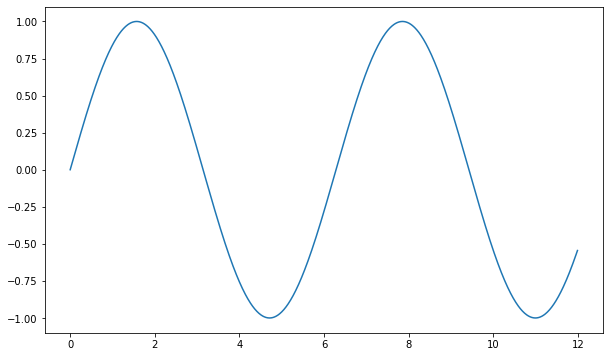

In [36]:
t = np.arange(0,12,0.01)
y = np.sin(t)
plt.figure(figsize = (10,6))
plt.plot(t,y)
plt.show()

In [68]:
from matplotlib import font_manager,rc
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font',family = font_name)


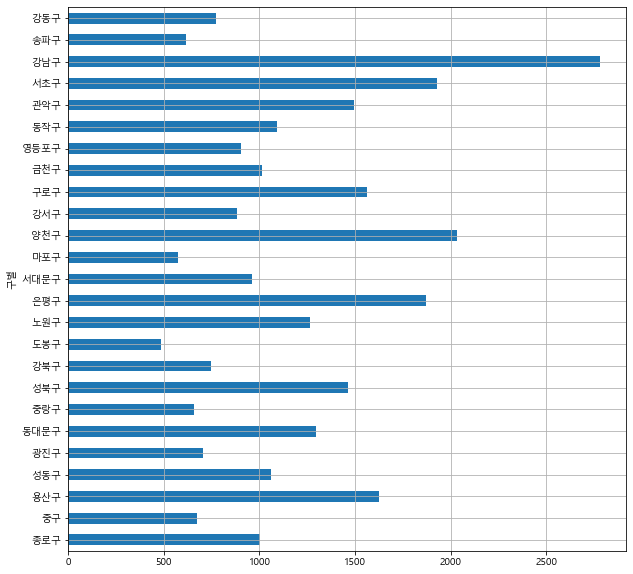

In [38]:
data_result["합계"].plot(kind = 'barh',grid = True,figsize = (10,10))
plt.show()


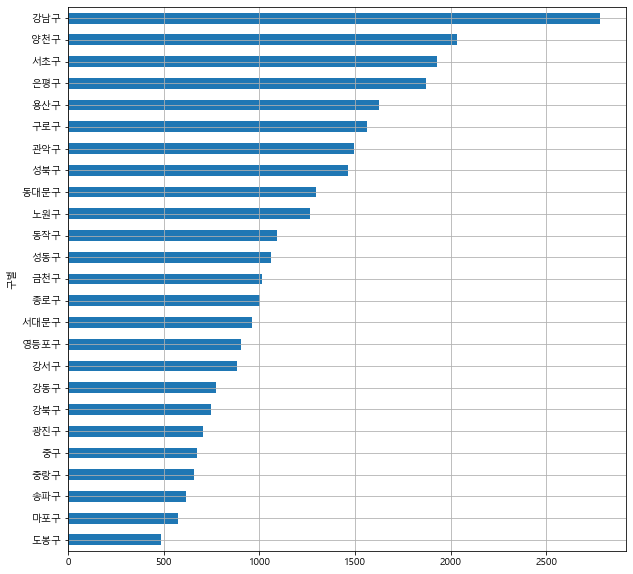

In [39]:
data_result["합계"].sort_values().plot(kind = 'barh',grid = True,figsize = (10,10))
plt.show()

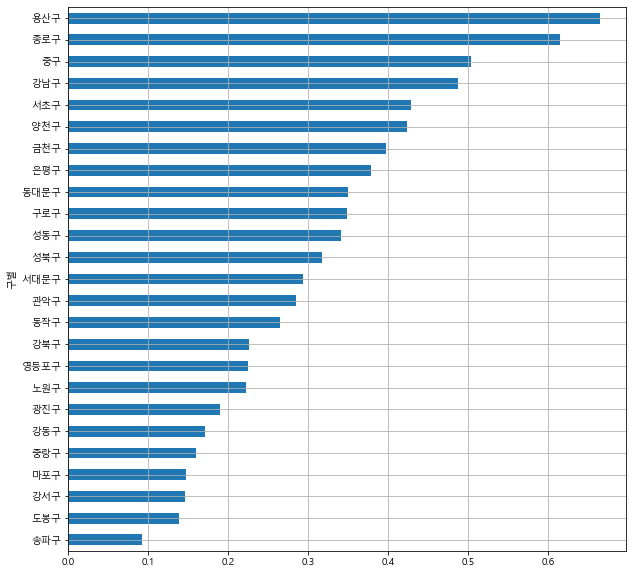

In [42]:
data_result["CCTV비율"] = data_result["합계"] / data_result["인구수"] * 100
data_result["CCTV비율"].sort_values().plot(kind = 'barh',grid = True,figsize = (10,10))
plt.show()

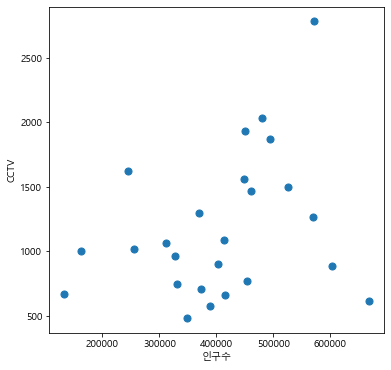

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["합계"],s = 50)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.show()

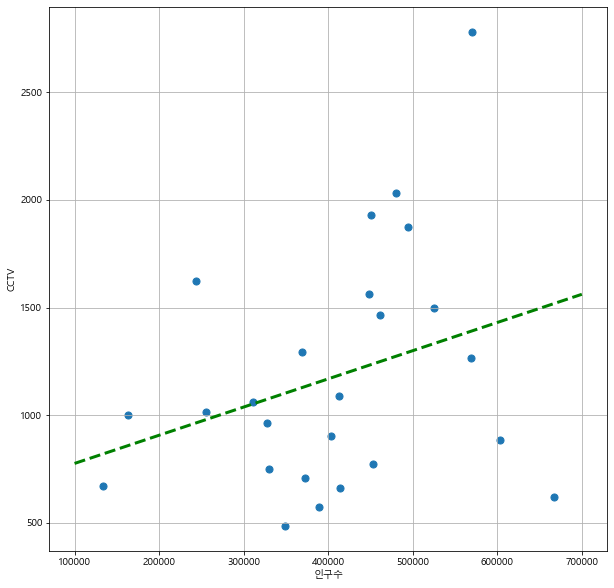

In [52]:
fp1 = np.polyfit(data_result["인구수"],data_result["합계"],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)
plt.figure(figsize= (10,10))
plt.scatter(data_result["인구수"],data_result["합계"],s = 50)
plt.plot(fx,f1(fx),ls = "dashed",lw = 3,color = 'g')
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()

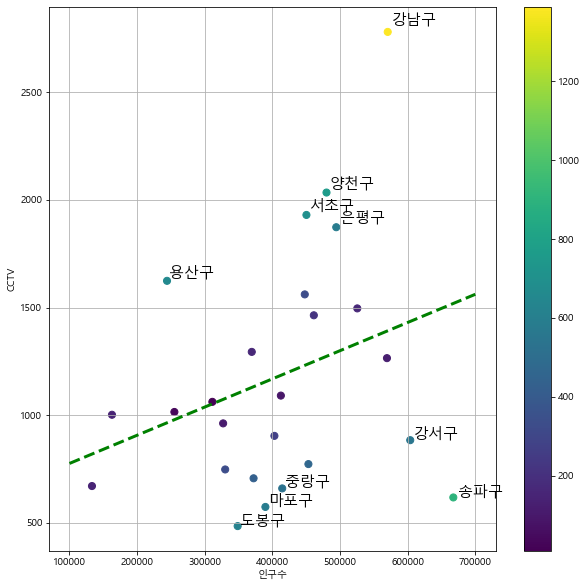

In [60]:
data_result["오차"] = np.abs(data_result["합계"] - f1(data_result["인구수"]))
df_sort = data_result.sort_values(by = "오차",ascending= False)

fp1 = np.polyfit(data_result["인구수"],data_result["합계"],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)
plt.figure(figsize= (10,10))
plt.scatter(data_result["인구수"],data_result["합계"],s = 50,c=data_result["오차"])
plt.plot(fx,f1(fx),ls = "dashed",lw = 3,color = 'g')
for n in range(10):
    plt.text(df_sort["인구수"][n]*1.01,df_sort["합계"][n]*1.01,df_sort.index[n],fontsize = 15)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar()
plt.show()

In [63]:
plt.rc('font',family = "malgun")

findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.
C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
findfont: Font family ['malgun'] not found. Falling back to DejaVu Sans.
C:\Users\SAMSUNG\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\SAMSUNG\AppData\Local\Programs\Py

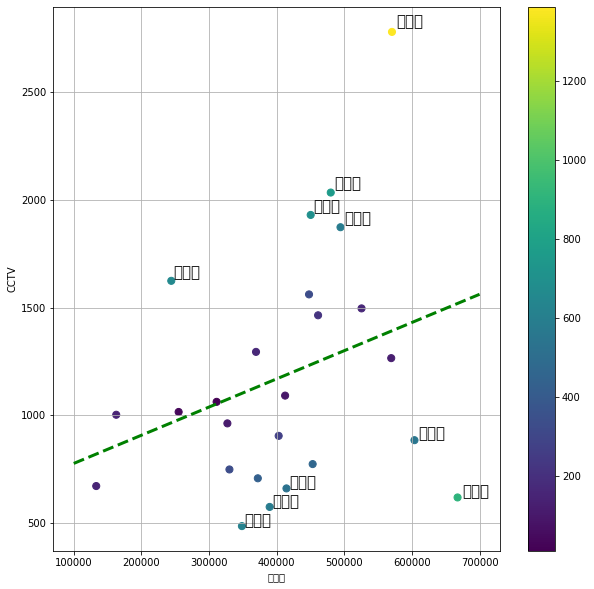

In [64]:
data_result["오차"] = np.abs(data_result["합계"] - f1(data_result["인구수"]))
df_sort = data_result.sort_values(by = "오차",ascending= False)

fp1 = np.polyfit(data_result["인구수"],data_result["합계"],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)
plt.figure(figsize= (10,10))
plt.scatter(data_result["인구수"],data_result["합계"],s = 50,c=data_result["오차"])
plt.plot(fx,f1(fx),ls = "dashed",lw = 3,color = 'g')
for n in range(10):
    plt.text(df_sort["인구수"][n]*1.01,df_sort["합계"][n]*1.01,df_sort.index[n],fontsize = 15)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar()
plt.show()